### Exercici 1

- Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

- Crea almenys una visualització per:
    - Una variable categòrica (Districte o Barri)
    - Una variable numèrica (Preu)
    - Una variable numèrica i una categòrica (Districte i Preu)
    - Dues variables numèriques (Any o Trimestre i Preu)
    - Tres variables (Barri o Districte, Trimestre i Preu)  
    

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_csv("preu lloguer per trimestre i barri.csv")

df.head(10)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
5,2021,1,2,Eixample,6,la Sagrada Família,Lloguer mitjà mensual (Euros/mes),887.1
6,2021,1,2,Eixample,7,la Dreta de l'Eixample,Lloguer mitjà mensual (Euros/mes),1176.7
7,2021,1,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),1040.2
8,2021,1,2,Eixample,9,la Nova Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),964.0
9,2021,1,2,Eixample,10,Sant Antoni,Lloguer mitjà mensual (Euros/mes),898.7


In [3]:
len(df)

584

In [4]:
# Exploració de les dades que conté el dataframe; columnes i valors

for column in df.columns:
    unique_count = df[column].nunique()
    unique_values = df[column].unique()
    print(f"Column '{column}' has {unique_count} unique values:")
    print(unique_values)

Column 'Any' has 1 unique values:
[2021]
Column 'Trimestre' has 4 unique values:
[1 2 3 4]
Column 'Codi_Districte' has 10 unique values:
[ 1  2  3  4  5  6  7  8  9 10]
Column 'Nom_Districte' has 10 unique values:
['Ciutat Vella' 'Eixample' 'Sants-Montjuïc' 'Les Corts'
 'Sarrià-Sant Gervasi' 'Gràcia' 'Horta-Guinardó' 'Nou Barris'
 'Sant Andreu' 'Sant Martí']
Column 'Codi_Barri' has 73 unique values:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]
Column 'Nom_Barri' has 73 unique values:
['el Raval' 'el Barri Gòtic' 'la Barceloneta'
 'Sant Pere, Santa Caterina i la Ribera' 'el Fort Pienc'
 'la Sagrada Família' "la Dreta de l'Eixample"
 "l'Antiga Esquerra de l'Eixample" "la Nova Esquerra de l'Eixample"
 'Sant Antoni' 'el Poble Sec' 'la Marina del Prat Vermell'
 'la Marina de Port' 'la Font de la Guatlla' 'Hostafran

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


- El dataset conté 584 registres i 8 columnes amb la següent informació:

    - Any: 2021 per a tots els casos.
    - Trimestre: els 4 trimestres de l'any.
    - Codi_Districte: Codi numèric amb 10 valors
    - Nom_Districte: El nom d'aquests 10 valors.
    - Codi_Barri: Codi numèric amb 73 valors.
    - Nom_Barri: El nom d'aquests 73 valors.
    - Lloguer_mitja: Dos tipus de valors i dades; el lloguer mitjà mensual o el preu per metre quadrat, amb 292 registres per cada grup.
    - Preu: mensual o per metre quadrat i valors null amb '--'.

### Data cleaning

- Veient les dades podem observar que tenim dades a la columna "preu" amb el valor "--". Haurem d'esborrar aquestes dades.
- Que la columna 'Preu' té definit el seu type com a object, de cara a treballar les dades seria més convenient passar-ho a numèric.
- Que 'Codi_Districte' i 'Codi_Barri' estan definits com a Int quan a l'hora de treballar amb gràfics seria més convenient canviar-los a object.

In [6]:
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce') #, downcast='float'

- Mostrar els valors float amb dos decimals

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
df['Codi_Districte'] = df['Codi_Districte'].astype(object)
df['Codi_Barri'] = df['Codi_Barri'].astype(object)

In [9]:
# Eliminem i reiniciem l'índex.

df = df.dropna(subset=['Preu'])
df = df.reset_index(drop=True)

- Per esborrar-les primer haurem de reemplaçar el seu valor '--' per NaN, ja que directament amb dropna() no les esborra.

- Comprovem que hem esborrat i canviat les dades.

In [10]:
df.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

- Comprovem el tamany i les columnes del dataframe una vegada netejat

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    object 
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    object 
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 33.9+ KB


- Comprovo que no hi ha duplicats

In [12]:
duplicats = df.duplicated()
num_duplicates = duplicats.sum()
print("Hi ha", num_duplicates, "duplicats.")

Hi ha 0 duplicats.


### Resum estadístic

In [13]:
df['Lloguer_mitja'].unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

- Com hem vist a l'exploració, la columna lloguer té dos tipus de valors. Treurem un resum estadístic amb aquesta condició.

In [14]:
summary_stats = df.groupby(['Nom_Districte', 'Nom_Barri', 'Lloguer_mitja']).agg(
    Num_registres=('Preu', 'count'),
    Preu_maxim = ('Preu', 'max'),
    Preu_minim = ('Preu', 'min'),
    Mitjana = ('Preu', 'mean'),
)

summary_stats

Num_registres  \
Nom_Districte       Nom_Barri                                    Lloguer_mitja                                                
Ciutat Vella        Sant Pere, Santa Caterina i la Ribera        Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
                    el Barri Gòtic                               Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
                    el Raval                                     Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
                    la Barceloneta                               Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
Eixample            Sant Antoni                                  Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
                    el Fort Pienc                                Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
                    l'Antiga Esquerra de l'Eixample              Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
                    la Dreta de l'Eixample                       Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
                    la Nova Esquerra de l'Eixample               Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
                    la Sagrada Família                           Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
Gràcia              Vallcarca i els Penitents                    Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
                    el Camp d'en Grassot i Gràcia Nova           Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
                    el Coll                                      Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
                    la Salut                                     Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
                    la Vila de Gràcia                            Lloguer mitjà mensual (Euros/mes)                        4   
                                                                 Lloguer mitjà per superfície (Euros/m2 mes)              4   
Horta-Guinardó      Can Baró                  

- Filtrarem i crearem dos dataframes per si hem d'analitzar les dades entre:
    - Lloguer mitjà mensual (Euros/mes)
    - Lloguer mitjà per superfície (Euros/m2 mes)

In [15]:
preu_mes = df[df['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
preu_mes = preu_mes.reset_index(drop=True)
preu_mes.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.20
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.60
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.90
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.40
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.00


In [16]:
summary_stats_preu_mes = preu_mes.groupby('Nom_Districte',)['Preu'].describe()
summary_stats_preu_mes

,count,mean,std,min,25%,50%,75%,max
Nom_Districte,,,,,,,,
Ciutat Vella,16.00,858.92,70.78,759.20,800.23,870.00,924.50,968.40
Eixample,24.00,1000.55,105.24,887.10,922.80,964.95,1070.80,1220.80
Gràcia,20.00,877.26,65.81,745.40,859.18,895.65,921.80,961.00
Horta-Guinardó,40.00,765.01,61.54,653.50,726.45,756.30,817.83,884.20
Les Corts,12.00,1214.07,359.67,904.80,969.00,1007.90,1618.47,1816.50
Nou Barris,40.00,664.29,71.12,488.10,624.12,671.80,700.67,803.70
Sant Andreu,26.00,721.20,94.36,447.50,647.80,755.45,792.50,827.20
Sant Martí,40.00,916.45,178.81,700.50,795.35,869.20,976.98,1364.70
Sants-Montjuïc,28.00,798.93,38.95,691.90,778.33,805.25,818.35,872.50


In [18]:
preu_m2 = df[df['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']
preu_m2 = preu_m2.reset_index(drop=True)
preu_m2.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.80
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.30
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.50
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.30
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.90


In [19]:
summary_stats_preu_m2 = preu_m2.groupby('Nom_Districte',)['Preu'].describe()
summary_stats_preu_m2

,count,mean,std,min,25%,50%,75%,max
Nom_Districte,,,,,,,,
Ciutat Vella,16.00,13.78,1.42,12.30,12.88,13.20,14.38,16.40
Eixample,24.00,13.30,0.35,12.50,13.00,13.30,13.60,14.00
Gràcia,20.00,13.38,0.66,12.10,12.80,13.60,13.90,14.30
Horta-Guinardó,40.00,11.99,0.81,9.50,11.67,12.10,12.62,13.40
Les Corts,12.00,14.01,0.99,12.50,13.25,13.90,14.43,15.80
Nou Barris,40.00,10.92,1.16,8.10,9.97,11.45,11.72,12.70
Sant Andreu,26.00,11.15,1.22,6.70,10.75,11.60,11.88,12.50
Sant Martí,40.00,13.44,1.86,10.80,11.67,13.15,14.68,17.30
Sants-Montjuïc,28.00,12.68,0.95,10.20,12.45,13.00,13.20,13.80


- A nivell estadístic podem veure una mostra de 270 registres amb informació, com hem dit, del preu mensual per lloguer i del seu preu per m2 d'habitatge durant l'any 2021.
- Més endavant, amb el gràfic numèric podrem veure que el preu mitjà a Barcelona durant l'any 2021 oscil·lava entre els 871,59 €
- Que sobre el preu m2 no hi ha tanta diferència, això voldria dir, que la diferència radica també amb la mida, i que els pisos més petits tenen una relació preu/m2 més cara.
- Que els preus més alts i rang més elevat el trobem a les Corts per la idiosincràsia del barri, inclou Pedralbes.
- I els preus més econòmics els trobem a Nou Barris i Sant Andreu.

### Una variable categòrica (Districte o Barri)

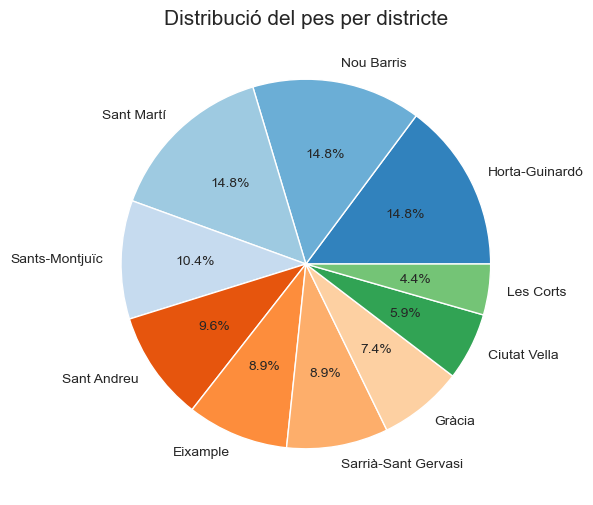

In [31]:
grafic_mostra = preu_mes['Nom_Districte'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(grafic_mostra.values, labels=grafic_mostra.index, colors=sns.color_palette('tab20c'), autopct='%1.1f%%')
plt.title('Distribució del pes per districte', fontsize=15)
plt.show()

- Podem veure que la mostra conté més dades als districtes d'Horta-Guinardó, Nou Barris i Sant Martí, en el cas contrari trobem, les Corts i Ciutat Vella que són els districtes amb menys registres.
- Només agafem les dades amb preu per mes, ja que les dades amb el preu_m2 són un duplicat del mateix contingut.

### Una variable numèrica (Preu)

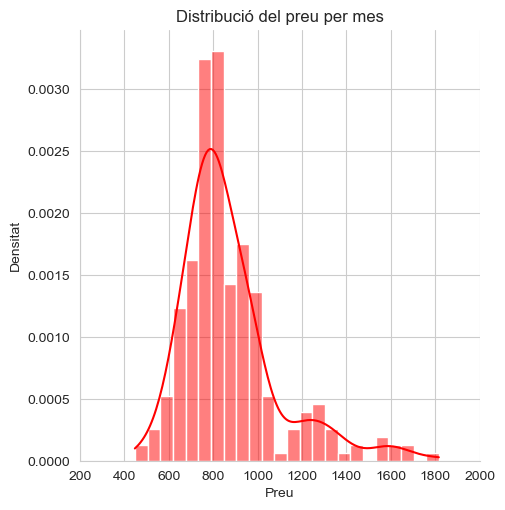

In [32]:
sns.displot(data=preu_mes, x='Preu', kde=True, stat="density", color='red')

# Per definir el rang de l'eix x
plt.xlim(200, 2000)

plt.title('Distribució del preu per mes')
plt.xlabel('Preu')
plt.ylabel('Densitat') #Concentració
plt.show()

In [22]:
preu_mitja_bcn = preu_mes['Preu'].mean()
preu_mitja_bcn

871.5937037037037

- Podem observar que la concentració més gran de pisos la trobem a l'oferta d'entre 750 i 800 euros.
- I que el preu mitjà és de 871,59 €

### Una variable numèrica i una categòrica (Districte i Preu)

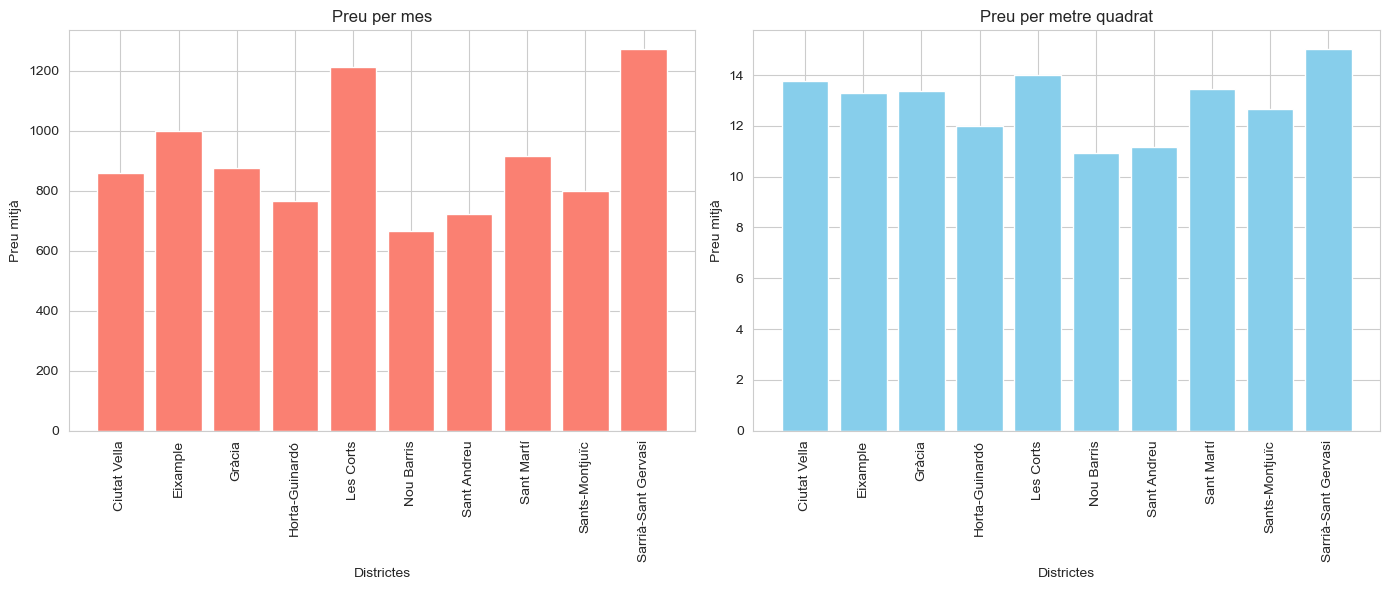

In [33]:
# Calculem la mitjana del preu per metre quadrat i per mes per a cada districte
preu_m2_mean = preu_m2.groupby('Nom_Districte')['Preu'].mean()
preu_mes_mean = preu_mes.groupby('Nom_Districte')['Preu'].mean()

# Configuro els subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gràfic de barres per preu/m2
axs[1].bar(preu_m2_mean.index, preu_m2_mean, color='skyblue')
axs[1].set_title('Preu per metre quadrat')
axs[1].set_xlabel('Districtes')
axs[1].set_ylabel('Preu mitjà')
axs[1].tick_params(axis='x', rotation=90)

# Gràfic de barres para preu/mes
axs[0].bar(preu_mes_mean.index, preu_mes_mean, color='salmon')
axs[0].set_title('Preu per mes')
axs[0].set_xlabel('Districtes')
axs[0].set_ylabel('Preu mitjà')
axs[0].tick_params(axis='x', rotation=90)

# Ajustar diseny i mostrar gràfics
plt.tight_layout()
plt.show()

- Podem observar que els districtes més cars són els de Sarria-Sant Gervasi i les Corts, al costat oposat, trobem Nou Barris i Sant Andreu com els districtes amb un preu més econòmic. Tot i que, si analitzem el preu m2 podem deduir que, encara que són més econòmics, la raó principal la trobem en que també són més petits. (La diferència de preu entre el districte més car i el més econòmic és de 613€, mentre que si mirem la diferència per m2, és només de 5,21€).

- Dues variables numèriques (Any o Trimestre i Preu)

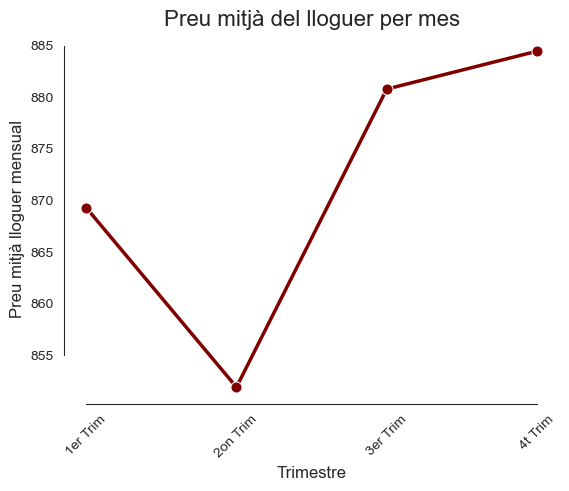

In [34]:
sns.set_style('white')
sns.lineplot(data=preu_mes, x ='Trimestre', y = 'Preu', marker='o', markersize=8, linewidth=2.5, color='#800000', errorbar=None)
plt.title('Preu mitjà del lloguer per mes', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Preu mitjà lloguer mensual', fontsize=12)
plt.xticks([1, 2, 3, 4], labels=['1er Trim', '2on Trim', '3er Trim', '4t Trim'], rotation=45)
sns.despine(trim=True)
plt.show()

In [25]:
mitjana_per_mes = preu_mes.groupby(['Trimestre'])['Preu'].mean().reset_index()

mitjana_per_mes

,Trimestre,Preu
0,1,869.30
1,2,851.91
2,3,880.79
3,4,884.47


- Podem observar que tot i la petita davallada dels preus durant el segon trimestre de l'any, els preus s'han mantingut força estables i en augment a mesura que transcorria el temps i l'any.

- Tres variables (Barri o Districte, Trimestre i Preu)   

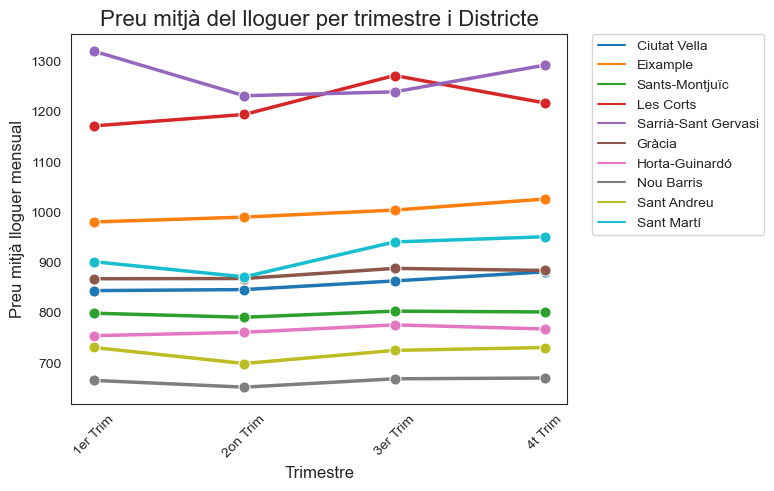

In [35]:
sns.set_style('white')
sns.lineplot(data=preu_mes, x='Trimestre', y='Preu', hue='Nom_Districte', palette='tab10', marker='o', markersize=8, linewidth=2.5, errorbar=None)
plt.title('Preu mitjà del lloguer per trimestre i Districte', fontsize=16)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Preu mitjà lloguer mensual', fontsize=12)
plt.xticks([1, 2, 3, 4], labels=['1er Trim', '2on Trim', '3er Trim', '4t Trim'], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [27]:
preu_mes_pivotado = preu_mes.pivot_table(index='Nom_Districte', columns='Trimestre', values='Preu')
preu_mes_pivotado

Trimestre,1,2,3,4
Nom_Districte,,,,
Ciutat Vella,844.27,846.30,863.50,881.62
Eixample,980.78,990.50,1004.47,1026.43
Gràcia,867.88,868.32,888.48,884.38
Horta-Guinardó,754.63,761.35,776.10,767.95
Les Corts,1171.93,1194.63,1272.13,1217.57
Nou Barris,665.72,652.20,668.81,670.44
Sant Andreu,731.15,699.27,725.33,731.04
Sant Martí,901.77,871.59,941.06,951.38
Sants-Montjuïc,799.27,791.23,803.41,801.81


In [28]:
mitjana_per_districte_i_mes = preu_mes.groupby(['Nom_Districte', 'Trimestre'])['Preu'].mean().reset_index()

mitjana_per_districte_i_mes

,Nom_Districte,Trimestre,Preu
0,Ciutat Vella,1,844.27
1,Ciutat Vella,2,846.30
2,Ciutat Vella,3,863.50
3,Ciutat Vella,4,881.62
4,Eixample,1,980.78
5,Eixample,2,990.50
6,Eixample,3,1004.47
7,Eixample,4,1026.43
8,Gràcia,1,867.88
9,Gràcia,2,868.32


- Podem observar que respecta el que comentàvem a l'anterior gràfic, no tots els districtes van patir aquesta davallada dels preus durant el 2on trimestres. Sarrià-Sant Gervasi, Sant Martí i Sant Andreu són els principals districtes on es va produir aquesta "caiguda" dels preus, mentre que la resta van continuar augmentant.

### Exercici 2

- Exporta els gràfics com imatges o com HTML.

In [37]:
plt.savefig('Grafic de la distribució per districte.png')
plt.savefig('Grafic de distribució del preu mitjà & concetració de la oferta.png')
plt.savefig('Grafic preu mes & preu m2 per districte.png')
plt.savefig('Grafic de preu mitjà per mes.png')
plt.savefig('Grafic de preu mitjà per mes i districte.png')

plt.savefig('Grafic de la distribució per districte.pdf', format = 'pdf')

<Figure size 640x480 with 0 Axes>

### Exercici 3

- Proposa alguna visualització que creguis que pot resultar interessant.

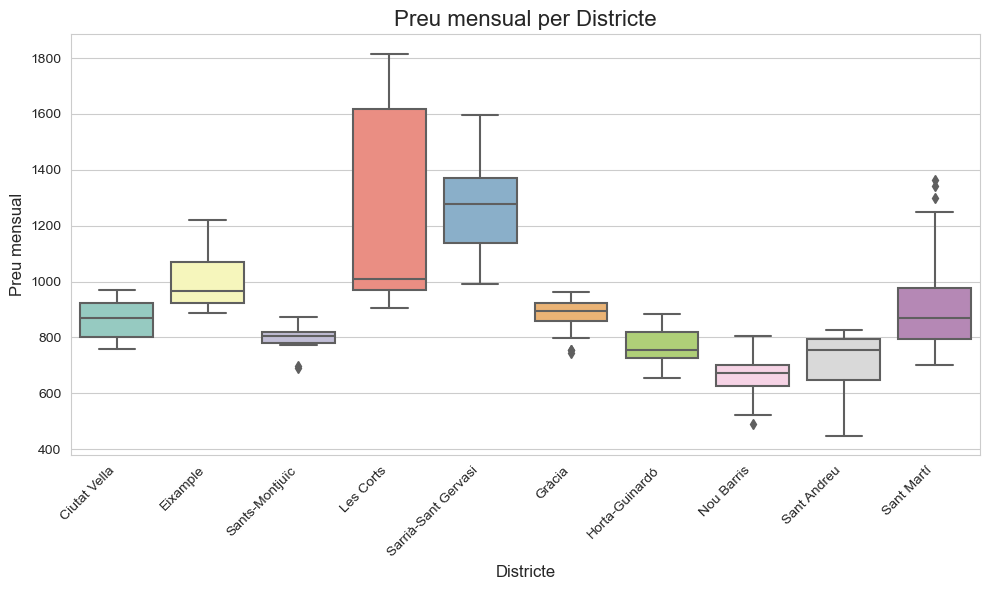

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=preu_mes, x='Nom_Districte', y='Preu', palette='Set3')
plt.title('Preu mensual per Districte', fontsize=16)
plt.xlabel("Districte", fontsize=12)
plt.ylabel("Preu mensual", fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

- Aquest tipus de gràfic és molt entenedor i visual respecte el que ja hem anat comentant. Podem veure preu mínim i màxim per districte i el seu preu mitjà.